<a href="https://colab.research.google.com/github/Seyfeddinee/person_detection/blob/main/hog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Approche

In [ ]:
import cv2
import imutils
import numpy as np

In [ ]:
def detect(frame):
    bounding_box_cordinates, weights =  HOGCV.detectMultiScale(frame, winStride = (4, 4), padding = (8, 8), scale = 1.03)
    
    person = 3
    for x,y,w,h in bounding_box_cordinates:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(frame, f'person {person}', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        person += 1
    
    cv2.putText(frame, 'Status : Detecting ', (40,40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)
    cv2.putText(frame, f'Total Persons : {person-1}', (40,70), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255,0,0), 2)


    return frame

In [ ]:

def detectByPathImage(path, output_path):
    image = cv2.imread(path)
    result_image = detect(image)
    cv2.imwrite(output_path, result_image)
    return result_image

def humanDetector(image_path,output_path):
    output_result = detectByPathImage(image_path, output_path)
    return output_result

In [ ]:

HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [ ]:

output_result= humanDetector("1660658400.jpg","output.png")

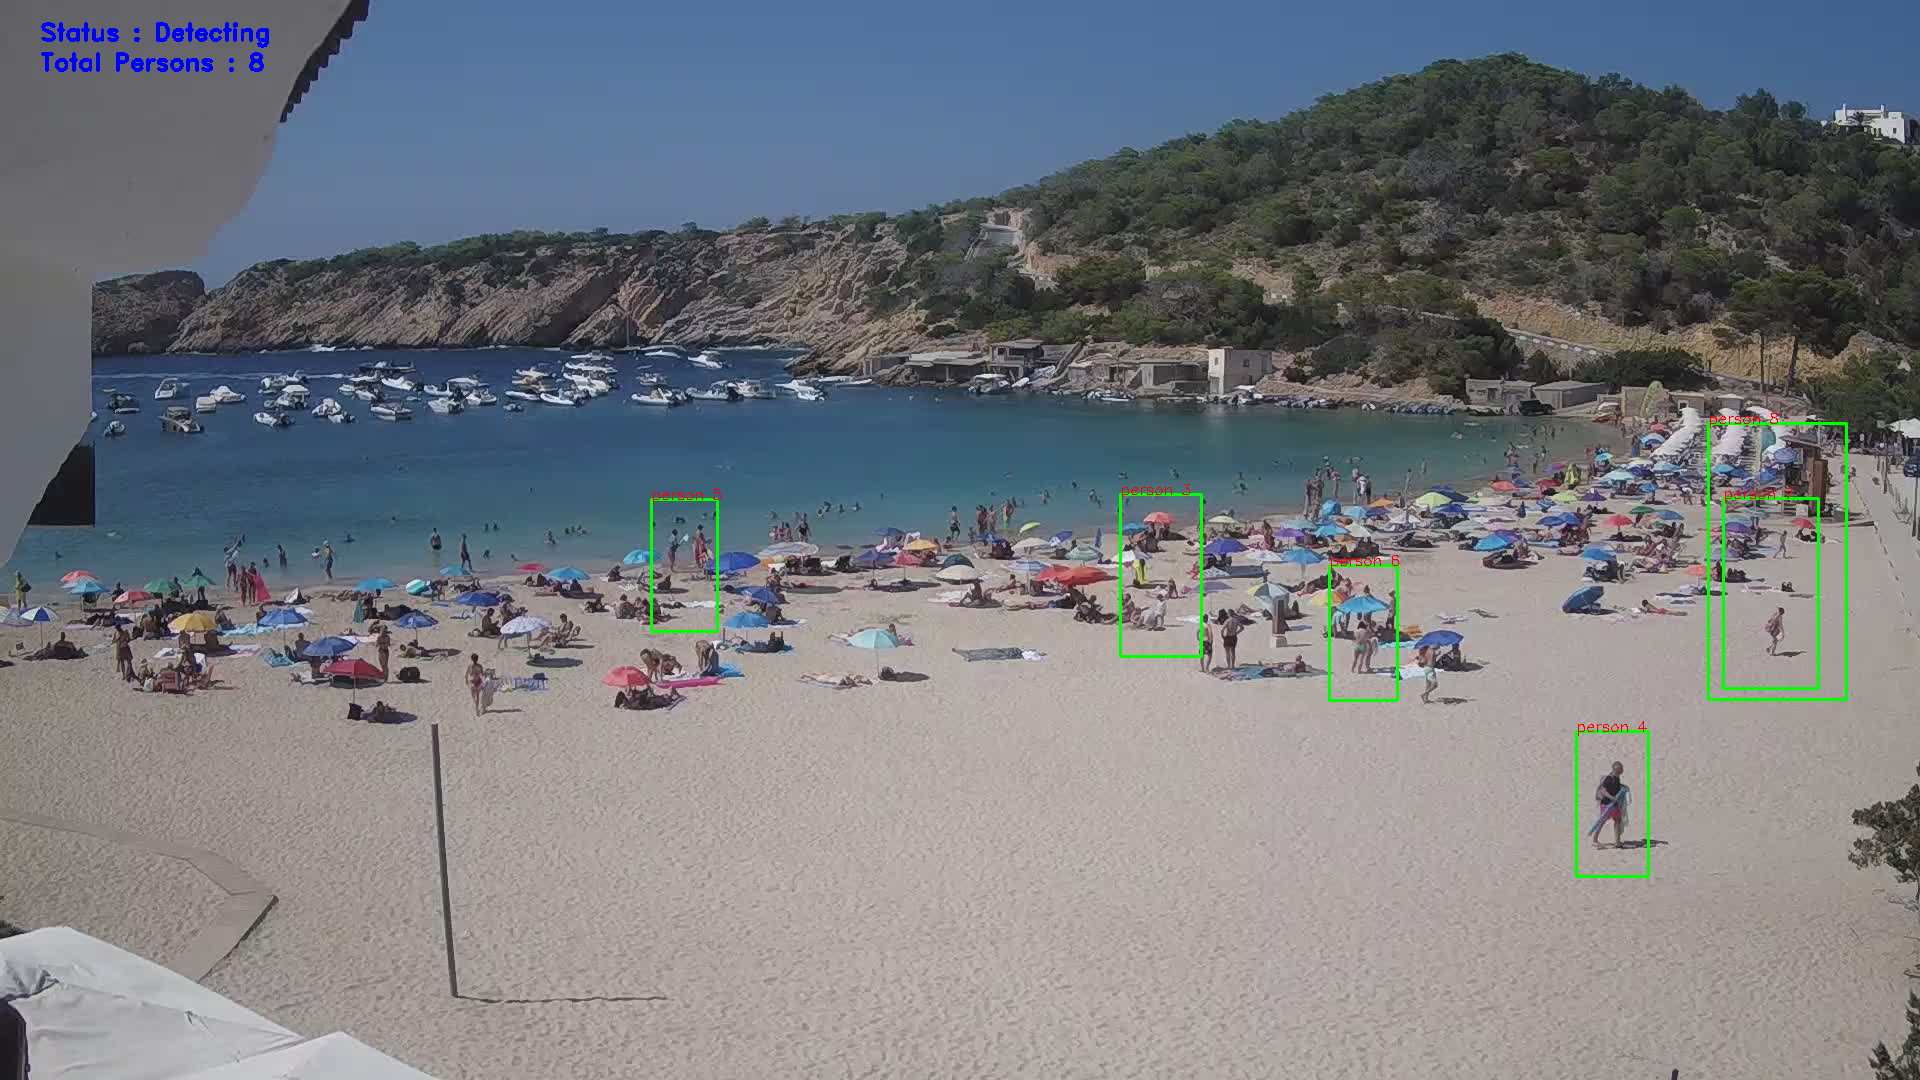

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(output_result)

# Second Approche

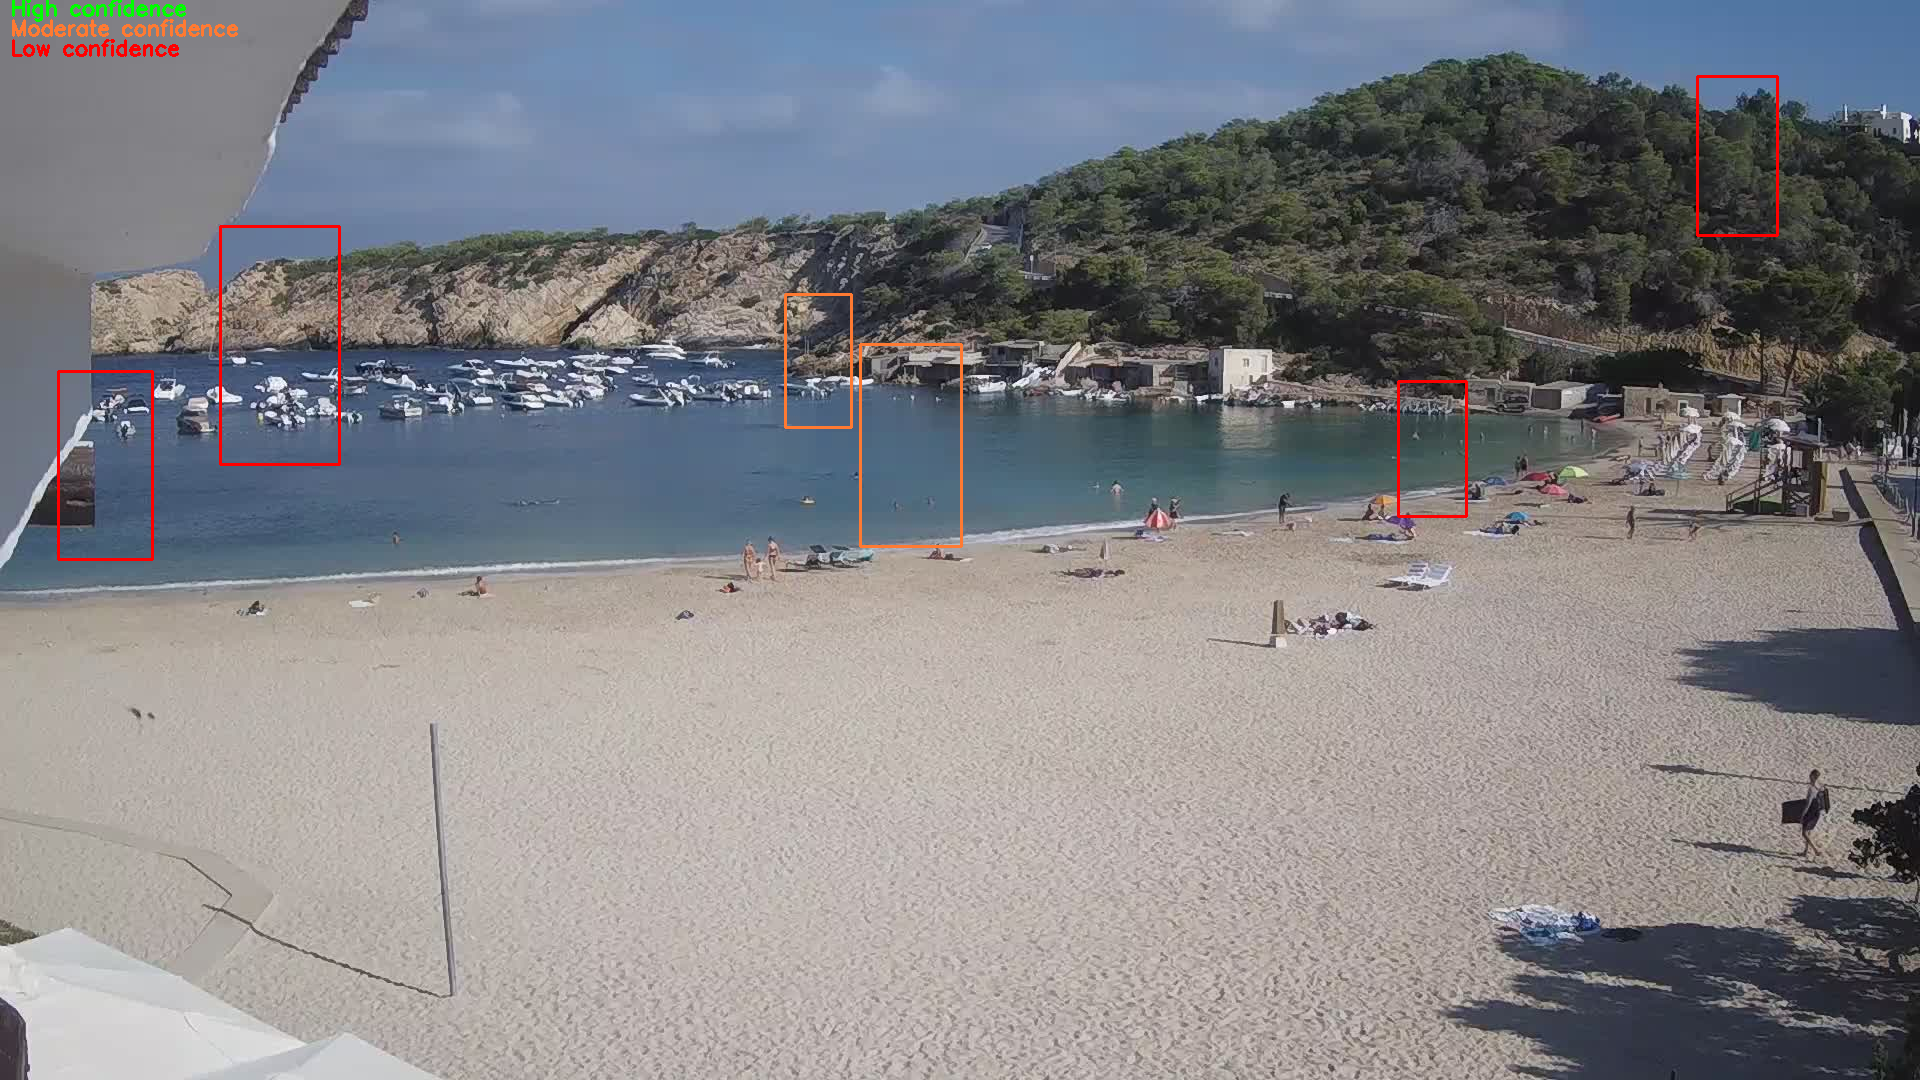

True

In [ ]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
image = cv2.imread("1660636800.jpg")

# keep a minimum image size for accurate predictions
if image.shape[1] < 400: # if image width < 400
    (height, width) = image.shape[:2]
    ratio = width / float(width) # find the width to height ratio
    image = cv2.resize(image, (400, width*ratio)) # resize the image according to the width to height ratio
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects, weights = hog.detectMultiScale(img_gray, winStride=(2, 2), padding=(10, 10), scale=1.02)
for i, (x, y, w, h) in enumerate(rects):
    if weights[i] < 0.13:
        continue
    elif weights[i] < 0.3 and weights[i] > 0.13:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    if weights[i] < 0.7 and weights[i] > 0.3:
        cv2.rectangle(image, (x, y), (x+w, y+h), (50, 122, 255), 2)
    if weights[i] > 0.7:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.putText(image, 'High confidence', (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(image, 'Moderate confidence', (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
cv2.putText(image, 'Low confidence', (10, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2_imshow(image)
#cv2.imshow('HOG detection', image)
cv2.imwrite("new_algo.jpg", image)
#cv2.waitKey(0)

In [ ]:
import cv2
import time

# initialize the HOG descriptor
hog = cv2.HOGDescriptor()

# read the image
image = cv2.imread("1660636800.jpg")

# convert the image to grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# measure the time it takes to compute the HOG descriptor
start = time.time()
hog_descriptor = hog.compute(img_gray)
end = time.time()

# calculate the efficiency of the HOG descriptor
efficiency = 1.0 / (end - start)

print(f"Efficiency: {efficiency} HOG/s")

Efficiency: 1.4244276043163073 HOG/s


In [ ]:
import cv2

# read the image
image = cv2.imread("1660636800.jpg")

# calculate the size and complexity of the image
rows, columns, channels = image.shape
size = rows * columns
complexity = size * channels

print(f"Size: {size} pixels")
print(f"Complexity: {complexity} pixels")

Size: 2073600 pixels
Complexity: 6220800 pixels
